In [7]:
import numpy as np
import random
from numpy.linalg import cholesky
import matplotlib.pyplot as plt

In [8]:
def calDistance(point1,point2):
    return np.linalg.norm(point1 - point2)

In [9]:
def updateClusterCenter(clusters):
    mean_center = []
    for cluster in clusters:
        sum_x = 0.
        sum_y = 0.
        for p in cluster:
            sum_x += p[0]
            sum_y += p[1]
        mean_center.append([sum_x/len(cluster), sum_y/len(cluster)])
    return mean_center

In [10]:
def updateCluster(point_set, mean_center):
    clusters = []
    for i in range(len(mean_center)):
        clusters.append([mean_center[i]])
    for point in point_set:
        d1 = calDistance(np.array(point), np.array(mean_center[0]))
        d2 = calDistance(np.array(point), np.array(mean_center[1]))        
        d3 = calDistance(np.array(point), np.array(mean_center[2]))        
        d4 = calDistance(np.array(point), np.array(mean_center[3]))        
        d5 = calDistance(np.array(point), np.array(mean_center[4]))
        cluster_index = np.argmin([d1, d2, d3, d4, d5])
        clusters[cluster_index].append(point)
    return clusters

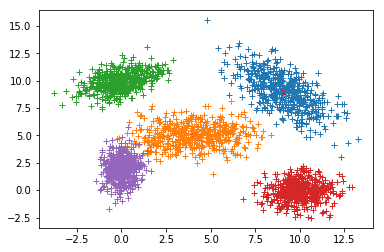

In [14]:
point_set = []
mean = np.array([[9,9], [4,5], [0,10], [10,0], [0,2]])
sigma = np.array([[[1,-1],[-1,4]],
                  [[3,0],[0,1]],
                  [[1,0.5],[0.5,1]],
                  [[1,1.5],[0.1,0.9]],
                  [[0.3,0],[0,1]]
                 ])
for seed in mean:
    point_set.append(seed.tolist())
plt.plot(mean[:,0],mean[:,1],"ro")

for i in range(len(mean)):
    R = cholesky(sigma[i])
    s = np.dot(np.random.randn(500,2),R) + mean[i]
    for point in s:
        point_set.append(point.tolist())
    plt.plot(s[:,0],s[:,1],"+")

0 iter result,moving distance of center = 13.584769774983979
1 iter result,moving distance of center = 5.714903466214635
2 iter result,moving distance of center = 1.540343796703103
3 iter result,moving distance of center = 2.321081089299235
4 iter result,moving distance of center = 3.644202061011015
5 iter result,moving distance of center = 2.232774722283935
6 iter result,moving distance of center = 0.48932244516894385
7 iter result,moving distance of center = 0.042330934912958966
8 iter result,moving distance of center = 0.02065064483604681
9 iter result,moving distance of center = 0.00847591086048342
10 iter result,moving distance of center = 1.7557178926966476e-05
11 iter result,moving distance of center = 3.683859466172373e-08
12 iter result,moving distance of center = 7.816728996274439e-11
13 iter result,moving distance of center = 1.6741635021129617e-13
14 iter result,moving distance of center = 5.551115123125783e-17
15 iter result,moving distance of center = 0.0
oral center = 
[

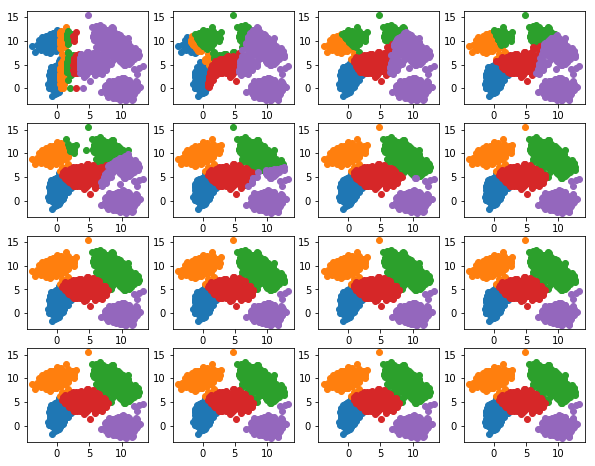

In [20]:
mean_center = [[0,0], [1,0], [2,0], [3,0], [4,0]]
iters = 16
plt.figure(figsize=(10,10))
for iter in range(iters):
    plt.subplot(int(iters)/4 + 1,4,iter+1)
    clusters = updateCluster(point_set, mean_center)
    for i in range(len(clusters)):
        s = np.array(clusters[i])
        if len(s) > 1:
            plt.plot(s[:,0],s[:,1],"o")
    new_mean_center = updateClusterCenter(clusters)
    print("{} iter result,moving distance of center = {}".format(iter,calDistance(np.array(new_mean_center),np.array(mean_center))))
    mean_center = new_mean_center

print("oral center = ")
for center in mean:
    print(center)
print("after k-means: center =")
for center in mean_center:
    print("{}".format(center))
print("oral simga = \n{}\nafter k-means,sigma = ".format(sigma))
for cluster in clusters:
    print(np.cov(np.array(cluster).T))

另一种生成高斯分布的方法

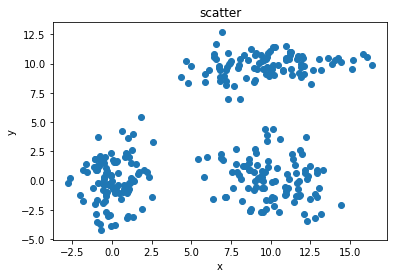

In [23]:
def gen_clusters(): 
    mean1 = [0,0] 
    cov1 = [[1,0],[0,4]] 
    data = np.random.multivariate_normal(mean1,cov1,100) 
    mean2 = [10,10] 
    cov2 = [[6,0],[0,1]] 
    data = np.append(data, np.random.multivariate_normal(mean2,cov2,100), 0) 
    mean3 = [10,0] 
    cov3 = [[3,0],[0,4]] 
    data = np.append(data, np.random.multivariate_normal(mean3,cov3,100), 0) 
    return np.round(data,4)

def show_scatter(data): 
    x,y = data.T 
#     plt.scatter(x,y,'o') 
    plt.plot(x,y,"o")
    plt.axis() 
    plt.title("scatter") 
    plt.xlabel("x") 
    plt.ylabel("y")
data = gen_clusters()
show_scatter(data)